## Random Forest vs N_Estimators

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import ShuffleSplit
#%%
Xtr = np.genfromtxt("data/X_train.txt",delimiter=None)
Ytr = np.genfromtxt("data/Y_train.txt",delimiter=None)
Xte = np.genfromtxt("data/X_test.txt",delimiter=None)

Xtr,param = ml.transforms.rescale(Xtr)
Xte,_ = ml.transforms.rescale(Xte,param)

X = Xtr[:50000]
Y = Ytr[:50000]
rs0 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
Xsp0 = rs0.split(X)

XtCV = []
XvCV = []
YtCV = []
YvCV = []
for tr_idx, va_idx in Xsp0:
    XtCV.append(X[tr_idx])
    XvCV.append(X[va_idx])
    YtCV.append(Y[tr_idx])
    YvCV.append(Y[va_idx])

In [2]:
errTN = []
errVN = []
NTree = list(range(50,401,50))
for n in NTree:
    errti=[]
    errvi=[]
    for i in range(5):
        rfr = RFR(n_estimators=n,max_depth=52,min_samples_leaf=10,min_samples_split=282)
        rfr.fit(XtCV[0],YtCV[0])
        errti.append(mse(YtCV[0],rfr.predict(XtCV[0])))
        errvi.append(mse(YvCV[0],rfr.predict(XvCV[0])))
    errti = np.array(errti)
    errvi = np.array(errvi)
    errTN.append(np.mean(errti))
    errVN.append(np.mean(errvi))

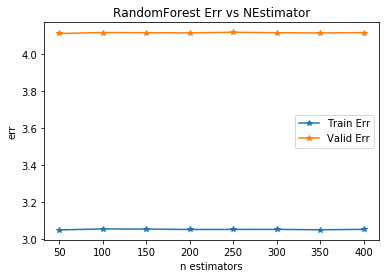

In [6]:
plt.plot(NTree, errTN,'*-', label='Train Err')
plt.plot(NTree, errVN,'*-', label='Valid Err')
plt.legend()
plt.title('RandomForest Err vs NEstimator')
plt.xticks(NTree,NTree)
plt.xlabel('n estimators')
plt.ylabel('err')
plt.savefig('rf_trees',dpi=2000)
plt.show()

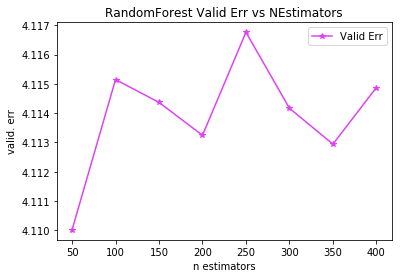

In [5]:
plt.plot(NTree, errVN,'*-',color='#df41f4',label='Valid Err')
plt.legend()
plt.title('RandomForest Valid Err vs NEstimators')
plt.xticks(NTree,NTree)
plt.xlabel('n estimators')
plt.ylabel('valid. err')
plt.savefig('rf_trees_va',dpi=2000)
plt.show()